In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from keras import backend as K
from keras.layers import Layer,InputSpec
import keras.layers as kl
from glob import glob
from sklearn.metrics import roc_curve, auc
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from sklearn.metrics import roc_auc_score
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from  matplotlib import pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import concatenate,Dense, Conv2D, MaxPooling2D, Flatten,Input,Activation,add,AveragePooling2D,BatchNormalization,Dropout
%matplotlib inline
import shutil
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
from tensorflow.python.platform import build_info as tf_build_info
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [ ]:
# gettig data
data = pd.read_csv('/content/drive/MyDrive/Project_Brain tumor/Dataset/final_metadata.csv')
data.head()

,ID,Label,ID
0,NaN,1.0,1.0
1,NaN,1.0,2.0
2,NaN,1.0,3.0
3,NaN,1.0,4.0
4,NaN,1.0,5.0


In [ ]:


train_dir = "/content/drive/MyDrive/Project_Brain tumor/Data/Train"
test_dir  =  "/content/drive/MyDrive/Project_Brain tumor/Data/Test"

os.mkdir(train_dir)
os.mkdir(test_dir)

In [ ]:
train_df , test_df = train_test_split(data, test_size=0.15, stratify=data['Label'])

In [ ]:
train_df.to_csv("/content/drive/MyDrive/Project_Brain tumor/Data/train")

In [ ]:
test_df.head()

,ID,Label,ID
1795,NaN,3.0,1796.0
1719,NaN,3.0,1720.0
1176,NaN,3.0,1177.0
1783,NaN,3.0,1784.0
1895,NaN,2.0,1896.0


In [ ]:
# Image id of train and test images
train_list = list(train_df['ID'])
test_list = list(test_df['ID'])

In [ ]:
# 1 for meningioma, 2 for glioma, 3 for pituitary tumor
# and also we want to change the path of the data and split them into their calsses
target = ['1' , '2' , '3']
for i in target:
  train_file = train_dir+'/'+i
  test_file = test_dir+'/'+i
  os.mkdir(train_file)
  os.mkdir(test_file)

In [ ]:
for item in train_list:
  # this os the sourc of all of the images
   source  = '/content/drive/MyDrive/Project_Brain tumor/Dataset/final_data/'+str(int(item))+'.jpg'
  # we have to copy the images from source to the directory which related to its label
   Picture_ID = train_df.loc[train_df["ID"] == item , 'Label'].iloc[0]

   target = '/content/drive/MyDrive/Project_Brain tumor/Data/Train/'+str(int(Picture_ID))+'/'+str(int(item))+'.jpg'

   shutil.copyfile(source, target)


In [ ]:
for item in test_list:
  # this os the sourc of all of the images
   source  = '/content/drive/MyDrive/Project_Brain tumor/Dataset/final_data/'+str(int(item))+'.jpg'
  # we ha1.0ve to copy the images from source to the directory which related to its label
   Picture_ID = test_df.loc[test_df["ID"] == item , 'Label'].iloc[0]

   target = '/content/drive/MyDrive/Project_Brain tumor/Data/Test/'+str(int(Picture_ID))+'/'+str(int(item))+'.jpg'

   shutil.copyfile(source, target)


In [ ]:
# now we have to use augmentation


In [ ]:
train_df.head()

,ID,Label,ID
2503,NaN,2.0,2504.0
2124,NaN,2.0,2125.0
2452,NaN,2.0,2453.0
2719,NaN,2.0,2720.0
545,NaN,1.0,546.0


In [ ]:
#  in the code below we try to generate some augmented pictures
target = ['1'  , '2' , '3']

for imag_calss in target :

  os.mkdir("/content/contemperory_images1")
  os.mkdir("/content/contemperory_images1/dir")

  image_list = os.listdir("/content/drive/MyDrive/Project_Brain tumor/Data/Train/"+ imag_calss)

  for image_file in image_list:

        source = os.path.join('/content/drive/MyDrive/Project_Brain tumor/Data/Train/' + imag_calss, image_file)

        target = os.path.join("/content/contemperory_images1/dir" , image_file)

        shutil.copyfile(source, target)

  save_aug = '/content/drive/MyDrive/Project_Brain tumor/Data/Train/' + imag_calss
  datagen = tf.keras.preprocessing.image.ImageDataGenerator(

        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'

    )
  batch_size = 50

  aug_datagen = datagen.flow_from_directory("/content/contemperory_images1",save_to_dir=save_aug,save_format='jpg',target_size=(512, 512),batch_size=batch_size)

    # Generate the augmented images
  aug_images = 8000

  num_files = len(os.listdir("/content/contemperory_images1/dir"))
  print(num_files)
  num_batches = int(np.ceil((aug_images - num_files) / batch_size))

    # creating 8000 augmented images per class
  for i in range(0, num_batches):
        images, labels = next(aug_datagen)

    # delete temporary directory
  shutil.rmtree("/content/contemperory_images1")



Found 601 images belonging to 1 classes.
601
Found 1212 images belonging to 1 classes.
1212
Found 790 images belonging to 1 classes.
790


In [ ]:
%cd /content/drive/MyDrive/Project_Brain tumor/Data
%cp -av Train/ /content/Train

Streaming output truncated to the last 5000 lines.
'Train/3/_260_5524390.jpg' -> '/content/Train/3/_260_5524390.jpg'
'Train/3/_7_3708155.jpg' -> '/content/Train/3/_7_3708155.jpg'
'Train/3/_314_3210372.jpg' -> '/content/Train/3/_314_3210372.jpg'
'Train/3/_737_4172929.jpg' -> '/content/Train/3/_737_4172929.jpg'
'Train/3/_711_9617892.jpg' -> '/content/Train/3/_711_9617892.jpg'
'Train/3/_388_3236269.jpg' -> '/content/Train/3/_388_3236269.jpg'
'Train/3/_88_4094950.jpg' -> '/content/Train/3/_88_4094950.jpg'
'Train/3/_157_9585765.jpg' -> '/content/Train/3/_157_9585765.jpg'
'Train/3/_654_8590536.jpg' -> '/content/Train/3/_654_8590536.jpg'
'Train/3/_522_276249.jpg' -> '/content/Train/3/_522_276249.jpg'
'Train/3/_10_8474754.jpg' -> '/content/Train/3/_10_8474754.jpg'
'Train/3/_115_6030264.jpg' -> '/content/Train/3/_115_6030264.jpg'
'Train/3/_750_2901722.jpg' -> '/content/Train/3/_750_2901722.jpg'
'Train/3/_203_4822079.jpg' -> '/content/Train/3/_203_4822079.jpg'
'Train/3/_46_3359730.jpg' -> '/cont

In [ ]:
train_path = '/content/Train'
test_path = '/content/Test'
batch_size = 16


In [ ]:
datagen=ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)

In [ ]:
image_size = 224
print("\nTrain Batches: ")
train_batches = datagen.flow_from_directory(directory=train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=batch_size,
                                            shuffle=True)

print("\nTest Batches: ")
test_batches =datagen.flow_from_directory(test_path,
                                           target_size=(image_size,image_size),
                                           batch_size=batch_size,
                                           shuffle=False)



Train Batches: 
Found 23234 images belonging to 3 classes.

Test Batches: 
Found 460 images belonging to 3 classes.


In [ ]:

#Soft Attention

from keras import backend as K
from keras.layers import Layer,InputSpec
import keras.layers as kl
import tensorflow as tf



class SoftAttention(Layer):
    def __init__(self,ch,m,concat_with_x=False,aggregate=False,**kwargs):
        self.channels=int(ch)
        self.multiheads = m
        self.aggregate_channels = aggregate
        self.concat_input_with_scaled = concat_with_x


        super(SoftAttention,self).__init__(**kwargs)

    def build(self,input_shape):

        self.i_shape = input_shape

        kernel_shape_conv3d = (self.channels, 3, 3) + (1, self.multiheads) # DHWC

        self.out_attention_maps_shape = input_shape[0:1]+(self.multiheads,)+input_shape[1:-1]

        if self.aggregate_channels==False:

            self.out_features_shape = input_shape[:-1]+(input_shape[-1]+(input_shape[-1]*self.multiheads),)
        else:
            if self.concat_input_with_scaled:
                self.out_features_shape = input_shape[:-1]+(input_shape[-1]*2,)
            else:
                self.out_features_shape = input_shape


        self.kernel_conv3d = self.add_weight(shape=kernel_shape_conv3d,
                                        initializer='he_uniform',
                                        name='kernel_conv3d')
        self.bias_conv3d = self.add_weight(shape=(self.multiheads,),
                                      initializer='zeros',
                                      name='bias_conv3d')

        super(SoftAttention, self).build(input_shape)

    def call(self, x):

        exp_x = K.expand_dims(x,axis=-1)

        c3d = K.conv3d(exp_x,
                     kernel=self.kernel_conv3d,
                     strides=(1,1,self.i_shape[-1]), padding='same', data_format='channels_last')
        conv3d = K.bias_add(c3d,
                        self.bias_conv3d)
        conv3d = kl.Activation('relu')(conv3d)

        conv3d = K.permute_dimensions(conv3d,pattern=(0,4,1,2,3))


        conv3d = K.squeeze(conv3d, axis=-1)
        conv3d = K.reshape(conv3d,shape=(-1, self.multiheads ,self.i_shape[1]*self.i_shape[2]))

        softmax_alpha = K.softmax(conv3d, axis=-1)
        softmax_alpha = kl.Reshape(target_shape=(self.multiheads, self.i_shape[1],self.i_shape[2]))(softmax_alpha)


        if self.aggregate_channels==False:
            exp_softmax_alpha = K.expand_dims(softmax_alpha, axis=-1)
            exp_softmax_alpha = K.permute_dimensions(exp_softmax_alpha,pattern=(0,2,3,1,4))

            x_exp = K.expand_dims(x,axis=-2)

            u = kl.Multiply()([exp_softmax_alpha, x_exp])

            u = kl.Reshape(target_shape=(self.i_shape[1],self.i_shape[2],u.shape[-1]*u.shape[-2]))(u)

        else:
            exp_softmax_alpha = K.permute_dimensions(softmax_alpha,pattern=(0,2,3,1))

            exp_softmax_alpha = K.sum(exp_softmax_alpha,axis=-1)

            exp_softmax_alpha = K.expand_dims(exp_softmax_alpha, axis=-1)

            u = kl.Multiply()([exp_softmax_alpha, x])

        if self.concat_input_with_scaled:
            o = kl.Concatenate(axis=-1)([u,x])
        else:
            o = u

        return [o, softmax_alpha]

    def compute_output_shape(self, input_shape):
        return [self.out_features_shape, self.out_attention_maps_shape]


    def get_config(self):
        return super(SoftAttention,self).get_config()




In [ ]:
densenet = tf.keras.applications.DenseNet201(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,

)
# Exclude the last 28 layers of the model.
conv = densenet.layers[-28].output

82524592/82524592 [==============================] - 4s 0us/step


In [ ]:
attention_layer,map2 = SoftAttention(aggregate=True,m=16,concat_with_x=False,ch=int(conv.shape[-1]),name='soft_attention')(conv)
attention_layer=(MaxPooling2D(pool_size=(2, 2),padding="same")(attention_layer))
conv=(MaxPooling2D(pool_size=(2, 2),padding="same")(conv))

conv = concatenate([conv,attention_layer])
conv  = Activation('relu')(conv)
conv = Dropout(0.5)(conv)

In [ ]:


output = Flatten()(conv)
output = Dense(3, activation='softmax')(output)
model = Model(inputs=densenet.input, outputs=output)


In [ ]:
opt1=tf.keras.optimizers.Adam(learning_rate=0.01,epsilon=0.1)
model.compile(optimizer=opt1,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
class_weights = {
                    0: 1.0,
                    1: 1.0,
                    2: 1.0,

                }

checkpoint=  ModelCheckpoint(filepath = 'saved_model.hdf5',monitor='val_accuracy',save_best_only=True,save_weights_only=True)


In [ ]:

Earlystop = EarlyStopping(monitor='val_loss', mode='min',patience=35, min_delta=0.001)
history = model.fit(train_batches,
                    steps_per_epoch=2600/10,
                    epochs=20,
                    verbose=2,
                    validation_data=test_batches,validation_steps=400/batch_size,callbacks=[checkpoint,Earlystop],class_weight=class_weights)


Epoch 1/20
260/260 - 269s - loss: 0.6821 - accuracy: 0.7139 - val_loss: 0.6957 - val_accuracy: 0.7575 - 269s/epoch - 1s/step
Epoch 2/20
260/260 - 98s - loss: 0.2230 - accuracy: 0.9168 - val_loss: 0.7140 - val_accuracy: 0.8425 - 98s/epoch - 377ms/step
Epoch 3/20
260/260 - 99s - loss: 0.1931 - accuracy: 0.9349 - val_loss: 0.2606 - val_accuracy: 0.9000 - 99s/epoch - 380ms/step
Epoch 4/20
260/260 - 96s - loss: 0.1678 - accuracy: 0.9413 - val_loss: 0.3607 - val_accuracy: 0.8925 - 96s/epoch - 371ms/step
Epoch 5/20
260/260 - 96s - loss: 0.1334 - accuracy: 0.9534 - val_loss: 0.3652 - val_accuracy: 0.8800 - 96s/epoch - 369ms/step
Epoch 6/20
260/260 - 96s - loss: 0.1237 - accuracy: 0.9541 - val_loss: 0.8089 - val_accuracy: 0.8025 - 96s/epoch - 369ms/step
Epoch 7/20
260/260 - 99s - loss: 0.0968 - accuracy: 0.9668 - val_loss: 0.1667 - val_accuracy: 0.9325 - 99s/epoch - 380ms/step
Epoch 8/20
260/260 - 99s - loss: 0.1072 - accuracy: 0.9649 - val_loss: 0.1866 - val_accuracy: 0.9425 - 99s/epoch - 381m

In [ ]:
from tensorflow.keras import models
model.load_weights("saved_model.hdf5")


In [ ]:
predictions = model.predict(test_batches, steps=460/batch_size, verbose=0)

In [ ]:
#geting predictions on test dataset
y_pred = np.argmax(predictions, axis=1)
targetnames = ['1', '2', '3']
#getting the true labels per image
y_true = test_batches.classes
#getting the predicted labels per image
y_prob=predictions
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_true)

# Creating classification report
report = classification_report(y_true, y_pred, target_names=targetnames)

print("\nClassification Report:")
print(report)



Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.92      0.95       106
           2       0.97      0.99      0.98       214
           3       0.98      0.99      0.98       140

    accuracy                           0.97       460
   macro avg       0.97      0.97      0.97       460
weighted avg       0.97      0.97      0.97       460



In [ ]:
print("Precision: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
print("weighted Roc score: " + str(roc_auc_score(y_test,y_prob,multi_class='ovr',average='weighted')))


Precision: 0.9738757684508235
Recall: 0.9739130434782609
Accuracy: 0.9739130434782609
weighted Roc score: 0.998341622743558


In [ ]:
print("Precision: "+ str(precision_score(y_true, y_pred, average='macro')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='macro')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
print("Macro Roc score: " + str(roc_auc_score(y_test,y_prob,multi_class='ovr',average='macro')))


Precision: 0.9738324993928242
Recall: 0.966965597736185
Accuracy: 0.9739130434782609
Macro Roc score: 0.9981448631554947


In [ ]:
print("Precision: "+ str(precision_score(y_true, y_pred, average='micro')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='micro')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
tpr={}
fpr={}
roc_auc={}
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print("Micro Roc score: " + str(roc_auc["micro"]))


Precision: 0.9739130434782609
Recall: 0.9739130434782609
Accuracy: 0.9739130434782609
Micro Roc score: 0.9983482986767486


In [ ]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(3):
    r = roc_auc_score(y_test[:, i], y_prob[:, i])
    print("The ROC AUC score of "+targetnames[i]+" is: "+str(r))


The ROC AUC score of 1 is: 0.9962957040827204
The ROC AUC score of 2 is: 0.998518349669478
The ROC AUC score of 3 is: 0.9996205357142857


In [ ]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i], drop_intermediate=False)
    roc_auc[i] = auc(fpr[i], tpr[i])


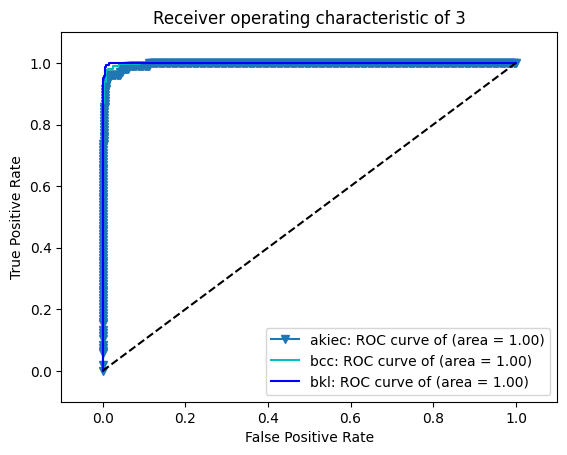

In [ ]:
plt.plot(fpr[0], tpr[0],'v-',label='akiec: ROC curve of (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1],'c',label='bcc: ROC curve of (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2],'b',label='bkl: ROC curve of (area = %0.2f)' % roc_auc[2])


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of %s'%targetnames[i])
plt.legend(loc="lower right")
plt.show()